Building a Linear Regression Model from scatch

In [4]:
#importing the libraries
import numpy as np

##### Linear Regression

In [5]:
class Linear_Regression():  # to create template, use class

#initiating the learning rate and iterations
    def __init__(self, learning_rate, no_of_iterations):
     
     self.learning_rate = learning_rate
     self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):
      # no. of training data & features

      self.m, self.n = X.shape

      # initiating the weight and bias

      self.w = np.zeros(self.n)
      self.b = 0 
      self.X = X
      self.Y = Y

      #implementing the gradient descent

      for i in range(self.no_of_iterations):
        self.update_weights()


    def update_weights(self):
       
       Y_prediction = self.predict(self.X)

       #calculating the gradient

       dw = -(2 *np.sum((self.X.T).dot(self.Y - Y_prediction)))/ self.m
       db = - 2 *np.sum(self.Y - Y_prediction)/ self.m

       # updating the weights

       self.w = self.w - self.learning_rate*dw
       self.b = self.b - self.learning_rate*db

    def predict(self, X):
         
         return X.dot(self.w) + self.b


Implementing Linear Regression

In [6]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
# Data Preprocesing

salary_data = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Project/ML/Supervised_Model/salary_data.csv')

salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
salary_data.shape

(30, 2)

In [9]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Train Test Split

In [10]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [11]:
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

Training a Linear Regression Model

In [13]:
model = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)

In [14]:
model.fit(X_train, Y_train)

In [15]:
# printing the weights and bias

print('Weight = ', model.w[0])
print('Bias = ', model.b)

Weight =  9580.301196603597
Bias =  23226.38946603212


In [16]:
# Predicting the salary for test data
test_prediction = model.predict(X_test)

print(test_prediction)

[ 35680.78102162  33764.7207823   66337.74485075  58673.50389347
  91246.52796192  80708.19664565 101784.85927818  51967.29305584
  42386.99185924  88372.43760294]


Visualization between actual vs predicted value

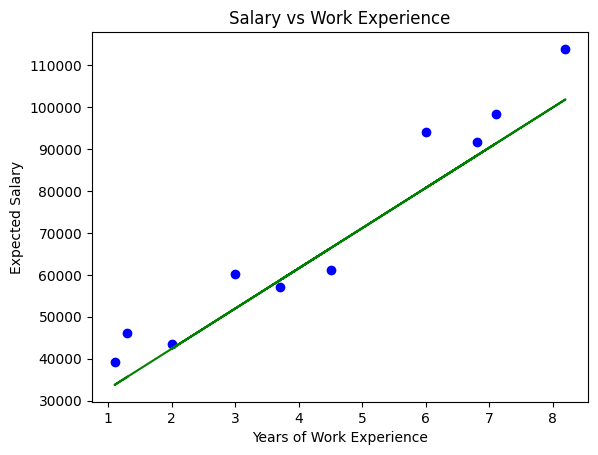

In [17]:
plt.scatter(X_test, Y_test, color ='blue')
plt.plot(X_test, test_prediction, color='green')
plt.xlabel('Years of Work Experience')
plt.ylabel('Expected Salary')
plt.title('Salary vs Work Experience')
plt.show()